In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the light curve data
file_path = "ltcrv4bands_rej_dt100.dat"  # Adjust if in subdirectory
raw_data = np.loadtxt(file_path)         # Shape: (880, 4)

# Sampling info
dt = 100  # seconds
time = np.arange(raw_data.shape[0]) * dt

# Energy band labels
band_labels = [
    "0.3–0.7 keV",    # Red
    "0.7–1.0 keV",    # Orange
    "1.0–4.0 keV",    # Green
    "4.0–10.0 keV"    # Blue
]


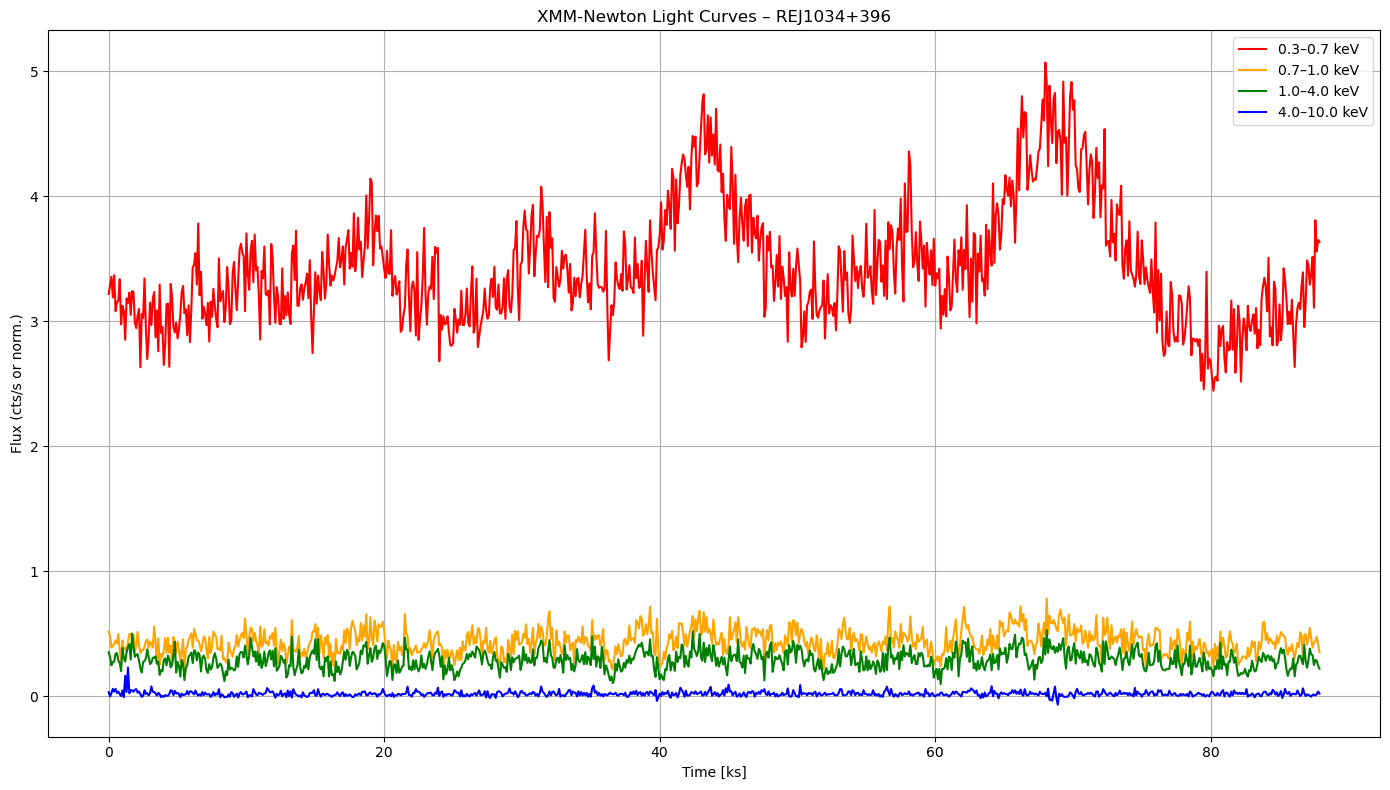

In [2]:
# Plot all bands
plt.figure(figsize=(14, 8))

colors = ["red", "orange", "green", "blue"]

for i in range(4):
    plt.plot(time / 1000, raw_data[:, i], label=f"{band_labels[i]}", color=colors[i])

plt.xlabel("Time [ks]")
plt.ylabel("Flux (cts/s or norm.)")
plt.title("XMM-Newton Light Curves – REJ1034+396")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


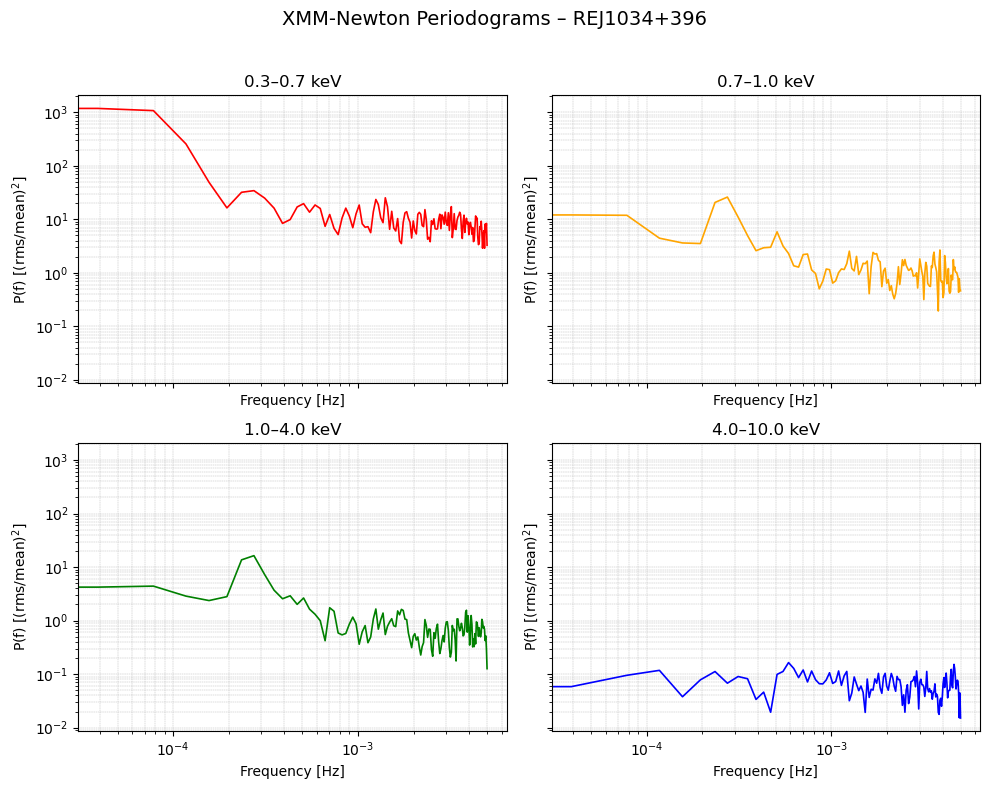

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Load the raw light curve file
file_path = "ltcrv4bands_rej_dt100.dat"
raw_data = np.loadtxt(file_path)
dt = 100  # time resolution in seconds
fs = 1.0 / dt  # sampling frequency in Hz

# Band labels and colors
band_labels = ["0.3–0.7 keV", "0.7–1.0 keV", "1.0–4.0 keV", "4.0–10.0 keV"]
colors = ["red", "orange", "green", "blue"]

# Create 2×2 PSD subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
axes = axes.flatten()

for i in range(4):
    ax = axes[i]
    flux = raw_data[:, i]

    # Compute Power Spectral Density using Welch method
    f, Pxx = welch(flux, fs=fs, nperseg=256)

    ax.plot(f, Pxx, color=colors[i], lw=1.2)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_title(band_labels[i])
    ax.set_xlabel("Frequency [Hz]")
    ax.set_ylabel(r"P(f) [(rms/mean)$^2$]")
    ax.grid(True, which="both", ls="--", lw=0.3)

plt.suptitle("XMM-Newton Periodograms – REJ1034+396", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


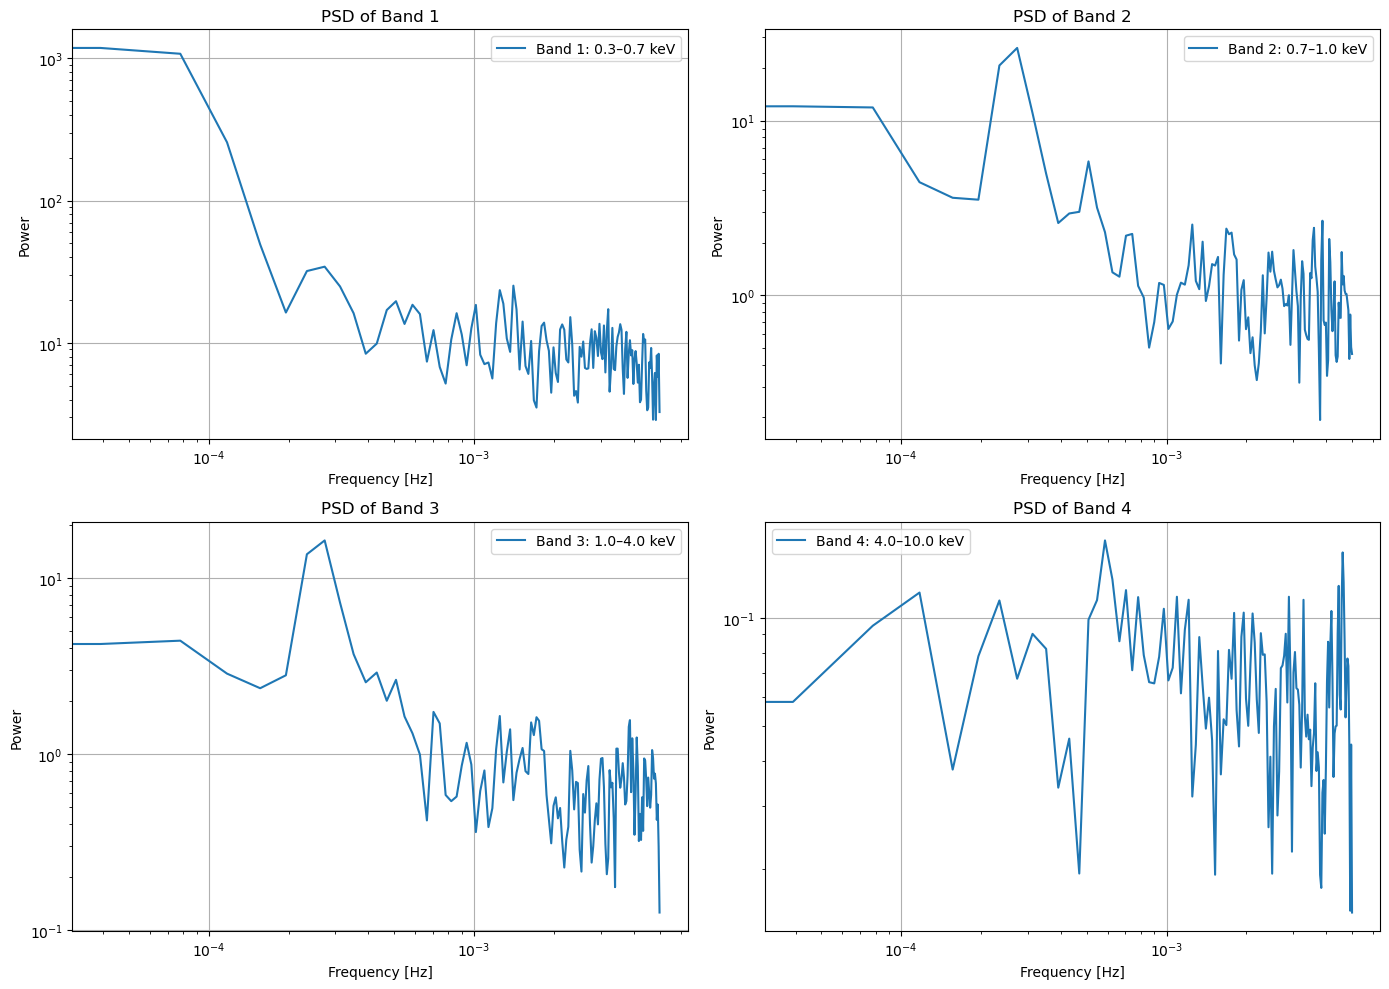

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Load the light curve data
data = np.loadtxt("ltcrv4bands_rej_dt100.dat")

# Each column represents a band; dt = 100s
dt = 100  # seconds
fs = 1 / dt  # sampling frequency in Hz
band_labels = ["0.3–0.7 keV", "0.7–1.0 keV", "1.0–4.0 keV", "4.0–10.0 keV"]

# Compute and plot PSD for each band
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i in range(4):
    f, Pxx = welch(data[:, i], fs=fs, nperseg=256)
    axs[i].loglog(f, Pxx, label=f"Band {i+1}: {band_labels[i]}")
    axs[i].set_xlabel("Frequency [Hz]")
    axs[i].set_ylabel("Power")
    axs[i].set_title(f"PSD of Band {i+1}")
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()


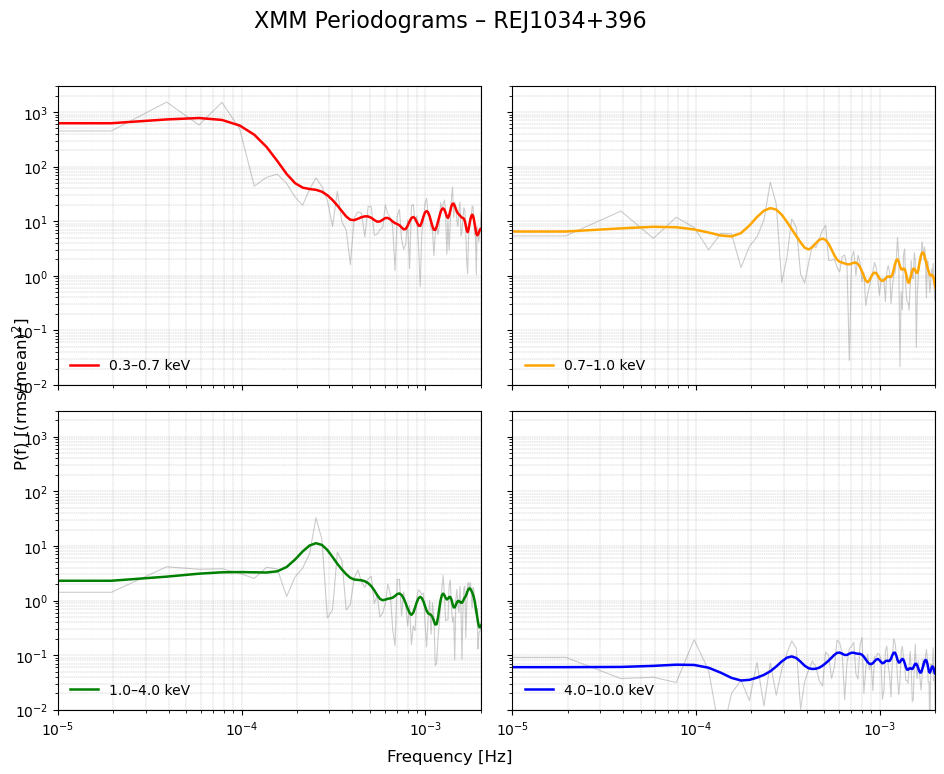

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from scipy.ndimage import gaussian_filter1d

# Load light curve data
data = np.loadtxt("ltcrv4bands_rej_dt100.dat")
dt = 100  # seconds
fs = 1 / dt
colors = ['red', 'orange', 'green', 'blue']
labels = ["0.3–0.7 keV", "0.7–1.0 keV", "1.0–4.0 keV", "4.0–10.0 keV"]

# Create 2×2 subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
axes = axes.flatten()

for i in range(4):
    flux = data[:, i]
    f, Pxx = welch(flux, fs=fs, nperseg=512)

    # Smooth PSD (e.g., Gaussian smoothing)
    Pxx_smooth = gaussian_filter1d(Pxx, sigma=2)

    ax = axes[i]
    ax.plot(f, Pxx, color="gray", alpha=0.4, lw=0.8)  # raw PSD as background
    ax.plot(f, Pxx_smooth, color=colors[i], lw=1.8, label=labels[i])

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(1e-5, 2e-3)
    ax.set_ylim(1e-2, 3e3)

    ax.legend(loc='lower left', fontsize=10, frameon=False)
    ax.grid(True, which="both", ls="--", lw=0.3)

# Label layout
fig.suptitle("XMM Periodograms – REJ1034+396", fontsize=16)
fig.text(0.5, 0.04, "Frequency [Hz]", ha='center', fontsize=12)
fig.text(0.06, 0.5, r"P(f) [(rms/mean)$^2$]", va='center', rotation='vertical', fontsize=12)

plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.show()


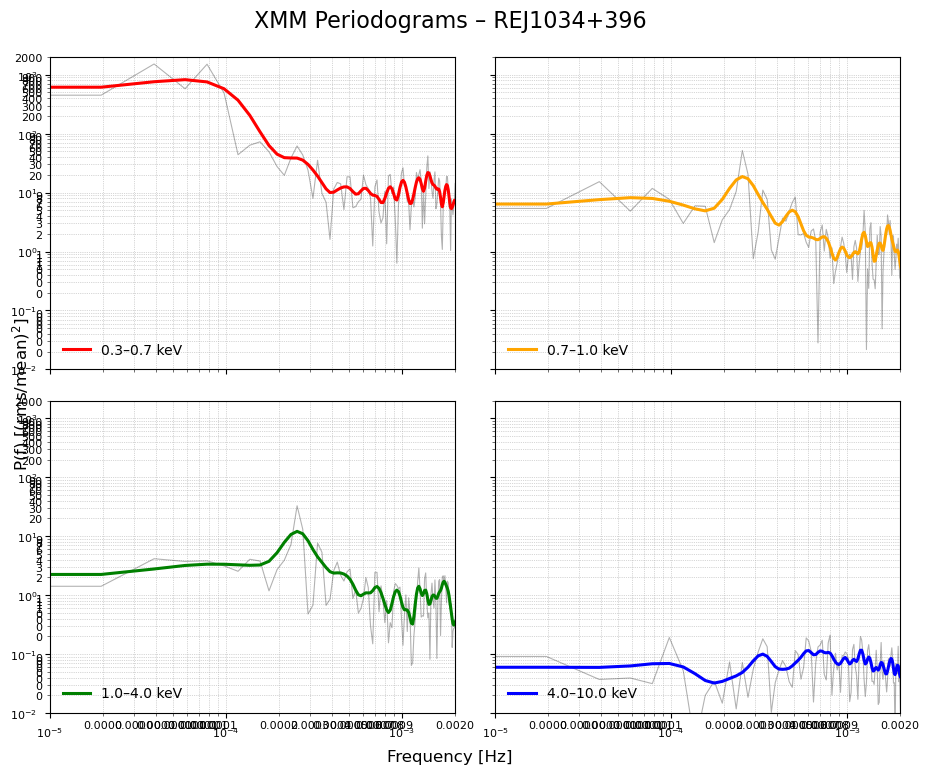

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from scipy.ndimage import gaussian_filter1d
from matplotlib.ticker import LogLocator, ScalarFormatter

plt.style.use("seaborn-v0_8-paper")  # for clean ticks

# Load .dat file
data = np.loadtxt("ltcrv4bands_rej_dt100.dat")
dt = 100
fs = 1 / dt

colors = ['red', 'orange', 'green', 'blue']
labels = ["0.3–0.7 keV", "0.7–1.0 keV", "1.0–4.0 keV", "4.0–10.0 keV"]

fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
axes = axes.flatten()

for i in range(4):
    flux = data[:, i]
    f, Pxx = welch(flux, fs=fs, nperseg=512)

    # Apply smoothing for visual
    Pxx_smooth = gaussian_filter1d(Pxx, sigma=1.8)

    ax = axes[i]
    ax.plot(f, Pxx, color="black", alpha=0.3, lw=0.8)  # raw PSD
    ax.plot(f, Pxx_smooth, color=colors[i], lw=2.2, label=labels[i])

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(1e-5, 2e-3)
    ax.set_ylim(1e-2, 2e3)

    ax.legend(loc='lower left', fontsize=10, frameon=False)

    ax.grid(True, which='both', ls=':', lw=0.5)

    # Improve tick formatting
    ax.xaxis.set_major_locator(LogLocator(base=10.0, numticks=5))
    ax.xaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=10))
    ax.xaxis.set_minor_formatter(ScalarFormatter())
    ax.yaxis.set_minor_formatter(ScalarFormatter())

    # Remove top x-tick labels
    if i in [0, 1]:
        ax.set_xticklabels([])

# Global label
fig.suptitle("XMM Periodograms – REJ1034+396", fontsize=16)
fig.text(0.5, 0.04, "Frequency [Hz]", ha='center', fontsize=12)
fig.text(0.06, 0.5, r"P(f) [(rms/mean)$^2$]", va='center', rotation='vertical', fontsize=12)

plt.subplots_adjust(hspace=0.1, wspace=0.1, left=0.1, right=0.95, top=0.92, bottom=0.1)
plt.show()


In [6]:
import numpy as np
from scipy.signal import welch

# --- Load your real XMM light curve file ---
file_path = "ltcrv4bands_rej_dt100.dat"  # Replace with actual path if needed
raw_data = np.loadtxt(file_path)         # Shape: (880, 4)

# --- Define sampling frequency ---
dt = 100        # seconds
fs = 1 / dt     # Hz

# --- Compute PSD using Welch for each of the 4 bands ---
psds = []
f = None

for i in range(4):
    f, Pxx = welch(raw_data[:, i], fs=fs, nperseg=256)
    psds.append(Pxx)

psds = np.array(psds)  # Shape: (4, n_freq_bins)

# --- Define energy band labels ---
band_labels = ["0.3-0.7", "0.7-1.0", "1.0-4.0", "4.0-10.0"]

# --- Save each PSD to separate .npy file for SBI use ---
for i, band in enumerate(band_labels):
    np.save(f"xmm_qpo_psd_obs_band_{band}.npy", psds[i])

# --- Optionally, print shapes or save frequency vector too ---
print(f"Saved PSDs: {psds.shape}, Frequency bins: {f.shape}")
np.save("xmm_qpo_psd_freqs.npy", f)


Saved PSDs: (4, 129), Frequency bins: (129,)


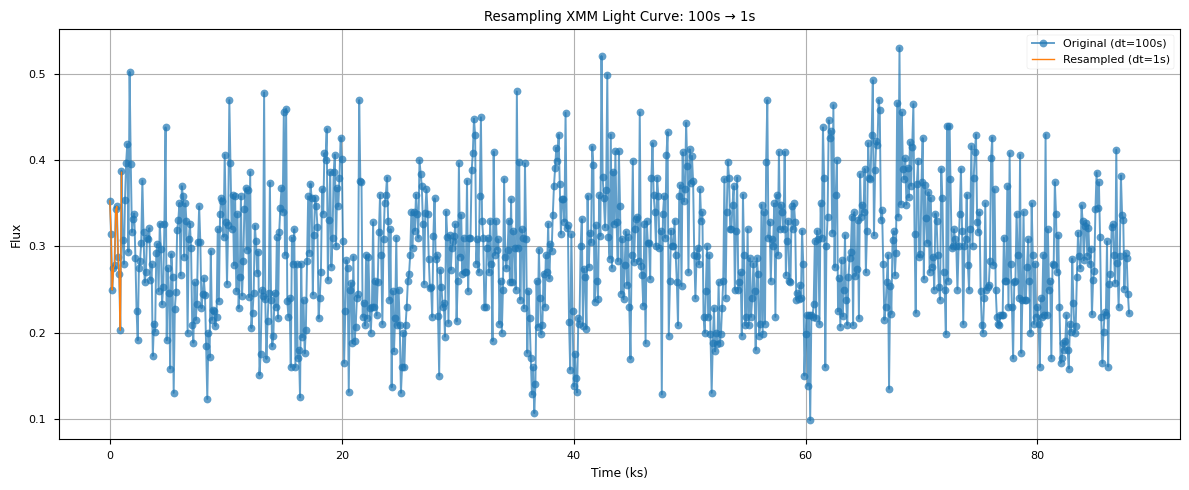

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# === Load real light curve (already done earlier) ===
raw_data = np.loadtxt("ltcrv4bands_rej_dt100.dat")  # shape (880, 4)
dt_original = 100  # original time resolution in seconds

# === Choose band (e.g. Band 3 = 1.0–4.0 keV) ===
band_index = 2  # You can try 0 to 3
original_flux = raw_data[:, band_index]

# === Build time array for original and target (resampled) ===
t_orig = np.arange(len(original_flux)) * dt_original  # in seconds
t_new = np.arange(0, t_orig[-1], 1.0)  # target: 1s spacing

# === Interpolate ===
interp_func = interp1d(t_orig, original_flux, kind='linear', fill_value="extrapolate")
resampled_flux = interp_func(t_new)

# === Plot original vs resampled (zoomed view) ===
plt.figure(figsize=(12, 5))
plt.plot(t_orig / 1000, original_flux, 'o-', label='Original (dt=100s)', alpha=0.7)
plt.plot(t_new[:1000] / 1000, resampled_flux[:1000], '-', label='Resampled (dt=1s)', linewidth=1)
plt.xlabel("Time (ks)")
plt.ylabel("Flux")
plt.title("Resampling XMM Light Curve: 100s → 1s")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
chunk = resampled_flux[:512].reshape(-1, 1).astype(np.float32)


In [ ]:
from scipy.signal import welch
import torch
import numpy as np

# Use your resampled_flux from earlier
fs = 1  # Hz, as expected by SBI
nperseg = 256

f, Pxx = welch(resampled_flux[:512], fs=fs, nperseg=nperseg)
psd_tensor = torch.tensor(Pxx, dtype=torch.float32)

# Save for SBI
np.save("xmm_qpo_psd_obs.npy", Pxx)
print("✅ Saved: xmm_qpo_psd_obs.npy")


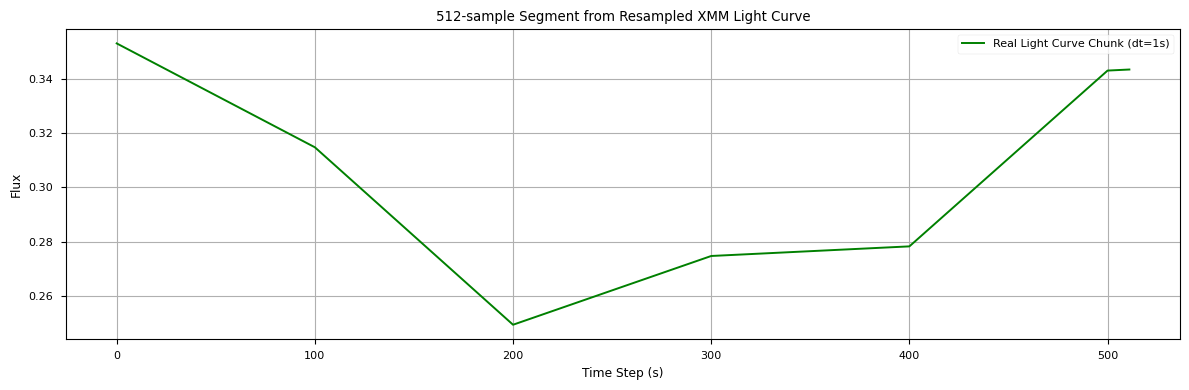

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# === Assumes you've already resampled your flux to 1s: resampled_flux ===
# For example: resampled_flux = interp_func(t_new)

# --- Extract 512-sample chunk (first 512 seconds) ---
chunk = resampled_flux[:512]  # shape: (512,)

# --- Plot ---
plt.figure(figsize=(12, 4))
plt.plot(chunk, label="Real Light Curve Chunk (dt=1s)", color='green')
plt.xlabel("Time Step (s)")
plt.ylabel("Flux")
plt.title("512-sample Segment from Resampled XMM Light Curve")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


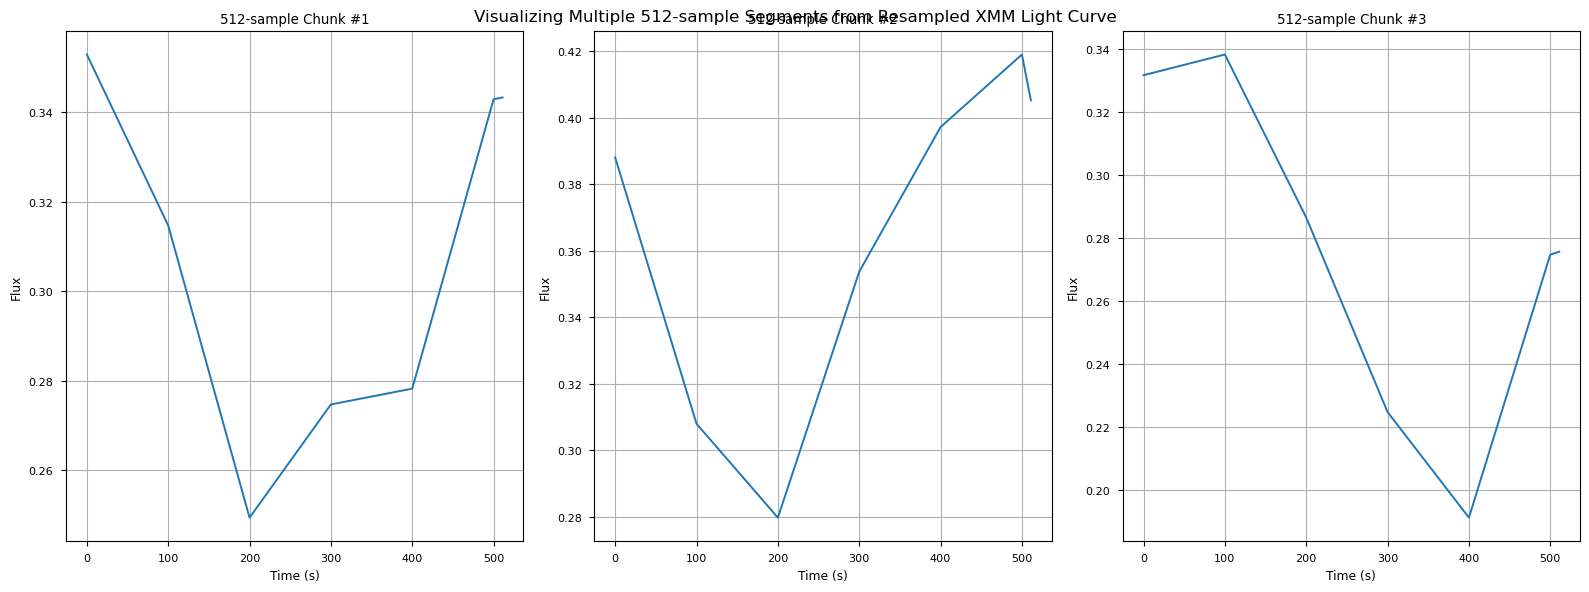

In [10]:
# Plot 3 chunks: starting at 0s, 1000s, 2000s
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

for i, start in enumerate([0, 1000, 2000]):
    chunk = resampled_flux[start:start+512]
    plt.subplot(1, 3, i + 1)
    plt.plot(chunk, label=f"Chunk {i+1} (start={start}s)")
    plt.xlabel("Time (s)")
    plt.ylabel("Flux")
    plt.title(f"512-sample Chunk #{i+1}")
    plt.grid(True)
    plt.tight_layout()

plt.suptitle("Visualizing Multiple 512-sample Segments from Resampled XMM Light Curve")
plt.show()


In [11]:
def plot_chunks_scrollable(signal, chunk_size=512, max_chunks=10):
    import matplotlib.pyplot as plt
    n = min(max_chunks, len(signal) // chunk_size)

    plt.figure(figsize=(18, 6))
    for i in range(n):
        chunk = signal[i*chunk_size:(i+1)*chunk_size]
        plt.plot(chunk, label=f"Chunk {i+1}", alpha=0.6)

    plt.title(f"First {n} Chunks of Light Curve (Each {chunk_size} samples)")
    plt.xlabel("Time Step")
    plt.ylabel("Flux")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


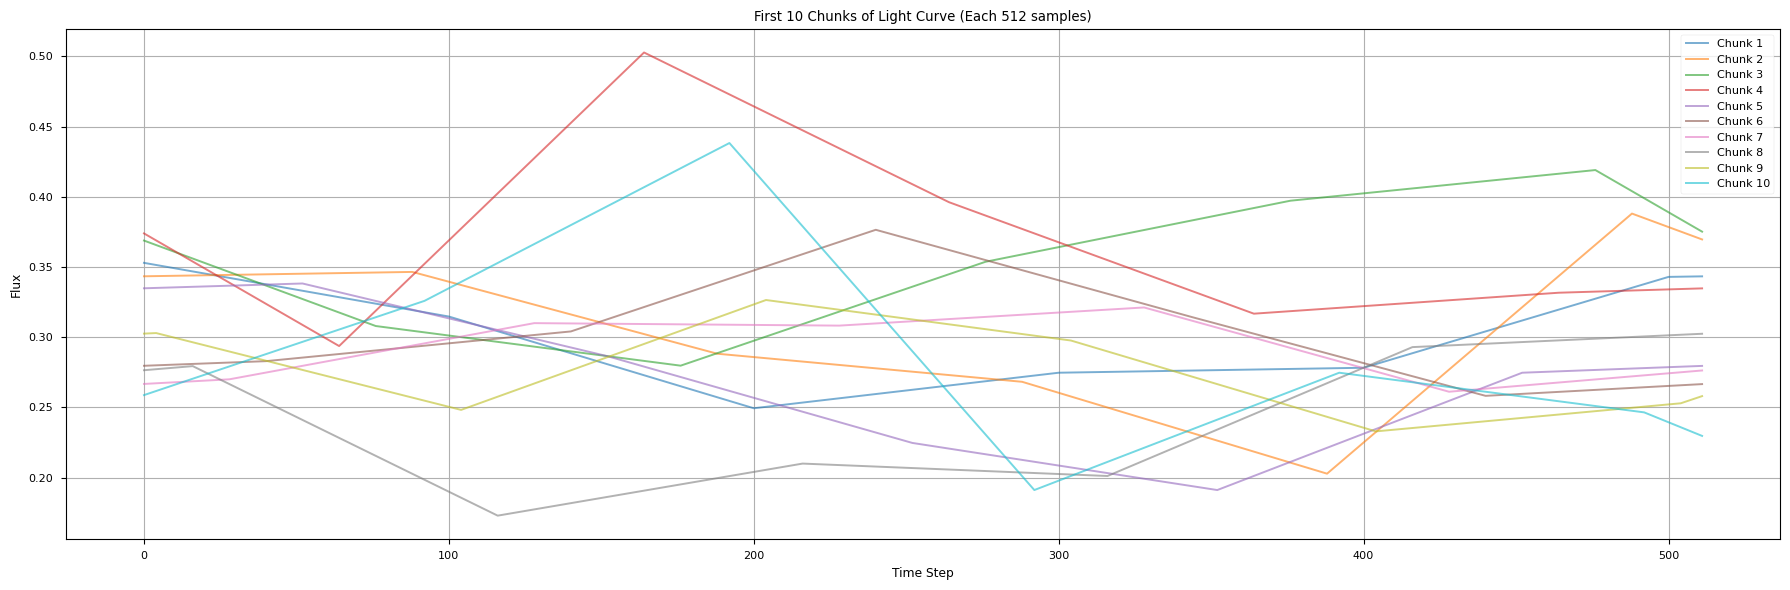

In [12]:
plot_chunks_scrollable(resampled_flux)

In [13]:
import numpy as np

# Assuming `resampled_flux` is your 1-second interpolated signal (dtype float32 or float64)
# You may also want to specify which band you're saving
np.save("resampled_xmm_band_0.3-0.7.npy", resampled_flux)
print("✅ Saved: resampled_xmm_band_0.3-0.7.npy")


✅ Saved: resampled_xmm_band_0.3-0.7.npy


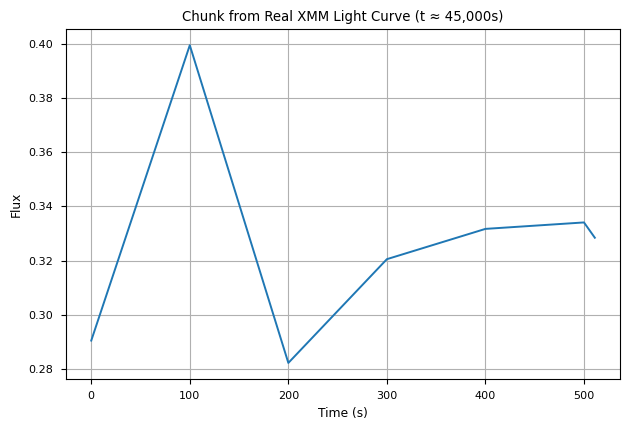

In [14]:
# Select 512s chunk from around t = 45000s
start_idx = 45000
chunk = resampled_flux[start_idx:start_idx+512]

# Quick check
import matplotlib.pyplot as plt
plt.plot(chunk)
plt.title("Chunk from Real XMM Light Curve (t ≈ 45,000s)")
plt.xlabel("Time (s)")
plt.ylabel("Flux")
plt.grid(True)
plt.tight_layout()
plt.show()
